<div style="text-align:center;">
  <img src="custom/molssi_main_horizontal.png" style="display: block; margin: 0 auto; max-height:200px;">
</div>


Examining and Visualizing Data
=============================

<strong>Author(s):</strong> Jessica A. Nash, The Molecular Sciences Software Institute

<div class="alert alert-block alert-info"> 
<h2>Overview</h2>

<strong>Questions:</strong>

* How can I use pandas to process data?

* How can I visualize relationships between different parts of my data?

<strong>Objectives:</strong>

* Use pandas and seaborn to load and explore data

</div>

[Pandas](https://pandas.pydata.org/docs/) is a Python library used for data analysis and manipulation. Within the world of data science, it is a ubiquitous and widely used library. If you are learning how to analyze data in Python, it will be almost impossible to avoid pandas. 

The central data structure of pandas is called a DataFrame. Pandas DataFrames work very closely with NumPy arrays and Pandas dataframes are specifically for data which is two dimensional (rows and columns). NumPy arrays, while similar in some ways, can work with higher dimensional data. 

Pandas is very powerful. In this session, we'll be learning how to access information in pandas dataframes and how to do some basic manipulation and analysis. We are going to be looking at a dataset which gives information about the elements in the periodic table.

In [ ]:
import pandas as pd
df = pd.read_csv("data/PubChemElements_all.csv")
df

## Examining Data

Initially when loading data in, and also at certain points as we're working with it, we'll want to see what our dataframe looks like. You can see a preview of your dataframe using the `.head` function

In [ ]:
df.head()

The `.info` function will give information about the columns and the data type of those columns. The data type will become very important later as we work with data more.

In [ ]:
df.info()

For this dataframe, we see that the first column, `AtomicNumber` has the data type of `int64`. Here, `int` means `integer` and `64` means `64 bit`.  The `64 bit` refers to the amount of computer memory the variable can occupy. It won't really be important for us. Similarly, `float64` means `64 bit floating point`. These are decimal numbers.

The other column names which read `object` are not numeric. They might be strings or they might be something else. We'll discuss more later.

The `describe` function can be used on a dataframe to quickly see statistics about columns with numerical data. If you look at the columns that statistics are computed for and compare to the data type shown from `info`, you will see that we only get statistics for columns which had `int64` or `float64` data types.

In [ ]:
df.describe()

This information is extremely useful for understanding the data. We can also easily visualize the distribution of each column using Pandas's ``hist`` function.

In [ ]:
df.hist(figsize=(8,8), edgecolor='black', grid=False)

## Accessing Data

Pandas dataframes have names for rows (called the "index" in Pandas) and columns.

Pandas dataframes have rows and columns, you can see how many rows and columns using `.shape`. This will return the shape as `(num_rows, num_columns)`.

In [ ]:
df.shape

There are a few methods for accessing information in a Pandas dataframe, but the one that will be most important in this workshop is selecting particular columns of data.

In [ ]:
df["AtomicNumber"].head()

In [ ]:
df[["Symbol", "ElectronConfiguration"]].head() # To select multiple columns, put list in brackets

## Performing calculations with pandas: No more `for` loops!

Both pandas and NumPy dataframes have the convenient feature that they can do element-wise operations and use something called `broadcasting`. This means that if you are doing something like subtracting a number, multiplying, etc to a column or dataframe of information, it can be done all at once instead of with a `for` loop. Consider if we wanted to calculate the melting point in degrees celsius for all of the elements.

Instead of writing a `for` loop that does this, we can just write the following code. This will return a pandas Series (one dimensional dataframe). 

In [ ]:
df['MeltingPoint'] - 273.15

We could do this one two columns as well.

In [ ]:
df[['MeltingPoint', 'BoilingPoint']] - 273.15

We can save these in new dataframe columns

In [ ]:
df[["MeltingPointC", "BoilingPointC"]] = df[['MeltingPoint', 'BoilingPoint']] - 273.15
df.head()

### The `.apply` method

The `.apply` method in pandas is used to apply a function along a row or column of a dataframe.
This is useful when you have a custom function that you need to use on every value in a column, but there is not a NumPy or Pandas function for it.

For example, we could apply the `len` function to our `Name` column to get the number of letters in the name for each element.

In [ ]:
# Number of letters in name - 
df["Name"].apply(len)

<div class="alert alert-block alert-success"> 
<strong>The .apply function</strong>

Notice that when we use `.apply`, we write the <strong>name</strong> of the function we want to apply, 
but we do not <strong>call</strong> the function. 
If we were to call the `len` function, we would use parentheses `()` with an argument.

</div>

## Using RDKit Functions with Pandas DataFrames
For an example more related to our work with RDKit, let's add some additional atomic data.
RDKit has the ability to get information about atoms.
We can create a periodic table with `Chem.GetPeriodicTable`, then use associated functions to get information about atoms.

In [ ]:
from rdkit import Chem

# Initialize the periodic table
periodic_table = Chem.GetPeriodicTable()

After we have a periodic table, we can apply functions from the periodic table to the atoms in our dataframe.

In [ ]:
df["NOuter"] = df["Symbol"].apply(periodic_table.GetNOuterElecs)
df.head()

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Use the `tab` key on your periodic table object to check for other values you can calculate for atoms.
Pick one to add to your periodic table dataset.

</div>

In [ ]:
useless_info = periodic_table.GetValenceList

We can save a CSV file with our newly calculated values using the `to_csv` function.

In [ ]:
df.to_csv("data/periodic_data_processed.csv")

## Visualization

Visualizing data helps in understanding relationships and patterns that might not be apparent from raw data. Here, we will use Seaborn, a statistical visualization library, to create plots from our periodic table dataset. Seaborn is built on top of matplotlib, so if we would like to adjust any of the plots seaborn makes, we can do that through the Matplotlib interface we've used before.

We will start with a bar plot to show the ionization energy of elements across different group blocks:


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.catplot(data=df, x="NOuter", y="IonizationEnergy", kind="bar")
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

The plot above shows us periodic trends that we learned about in introductory chemistry. The two highest ionization energy categories correspond to elements with 2 valence electrons and 8 valence electrons, representing filled shells.

Seaborn can also allow us to easily create scatter plots to visualize relationships between continuous variables. For example, we can create a scatter plot to show the relationship between ionization energy and atomic radius:

In [ ]:
sns.scatterplot(data=df, x="AtomicRadius", y="Electronegativity", hue="GroupBlock")
plt.title('Electronegativity vs. Atomic Radius')
plt.xlabel('Atomic Radius')
plt.ylabel('Electronegativity')

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

Create a few other categorical plots to observe periodic trends:

1. Electronegativity vs. Group Block as a bar plot.

2. Melting Point vs. Group Block as a bar plot.

3. Ionization Energy vs. Atomic Number as a scatter plot colored by GroupBlock.
   
</div>

In [ ]:
sns.barplot(data=df, x="GroupBlock", y="Electronegativity")
plt.title('Electronegativity vs. Group Block')
plt.xlabel('Group Block')
plt.ylabel('Electronegativity')
plt.xticks(rotation=45)

In [ ]:
sns.barplot(data=df, x="GroupBlock", y="MeltingPoint")
plt.title('Melting Point vs. Group Block')
plt.xlabel('Group Block')
plt.ylabel('Melting Point')
plt.xticks(rotation=45)

In [ ]:
sns.scatterplot(data=df, x="AtomicNumber", y="MeltingPoint") #, hue="GroupBlock")
plt.title('Melting Point vs. Atomic Number')
plt.xlabel('Atomic Number')
plt.ylabel('Melting Point')

### Visualizing Correlation

A common way to visualize relationships between different categories of data categories is with a correlation plot.
The correlation matrix provides insights into the relationships between the variables. A correlation value close to 1 indicates a strong positive relationship, while a correlation value close to -1 indicates a strong negative relationship. A correlation value close to 0 indicates no relationship between the features.

In [ ]:
# Calculate the correlation matrix
corr = df.corr(numeric_only=True)
corr

Seaborn can be used to create a heatmap to allow easier examination of the correlation of different variables.

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

The heatmap uses a "coolwarm" color scheme where red indicates positive correlation and blue indicates negative correlation between variables. Strongly correlated pairs are represented by darker shades of red, while strongly inversely correlated pairs are represented by darker shades of blue.

<div class="alert alert-block alert-warning">
<h3>Final Challenge</h3>

Repeat your homework from last night using Pandas and the `.apply` function.
The creation of a starting dataframe is done for you.
You should use the `apply` function to add new columns of data to your DataFrame.

Compare and contrast the code - do you prefer one over the other?

1. Read SMILES from a text file.
1. Make an RDKit molecule for each SMILES.
1. Get the number of heavy atoms, molecular weight, and one other descriptor of your choice.
1. Write a file with the data
</div>

### Read SMILES from a text file
I will use the with open command to do this.

In [1]:
import os
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
from rdkit.Chem import PandasTools

## This cell is provided for the challenge

# Ensure molecules are rendered in the notebook
PandasTools.RenderImagesInAllDataFrames(images=True)

In [2]:
os.listdir('data')
aa_file = os.path.join('data', 'amino_acids.txt')
with open(aa_file,'r') as outfile:
    aasmiles = outfile.readlines()

aasmiles_strip = []
for smiles in aasmiles:
    smiles = smiles.strip()
    aasmiles_strip.append(smiles)

aasmiles_strip

['C[C@H](N)C(=O)O',
 'NC(N)=NCCC[C@H](N)C(=O)O',
 'NC(=O)C[C@H](N)C(=O)O',
 'N[C@@H](CC(=O)O)C(=O)O',
 'N[C@@H](CS)C(=O)O',
 'N[C@@H](CCC(=O)O)C(=O)O',
 'NC(=O)CC[C@H](N)C(=O)O',
 'NCC(=O)O',
 'N[C@@H](Cc1cnc[nH]1)C(=O)O',
 'CC[C@H](C)[C@H](N)C(=O)O',
 'CC(C)C[C@H](N)C(=O)O',
 'NCCCC[C@H](N)C(=O)O',
 'CSCC[C@H](N)C(=O)O',
 'N[C@@H](Cc1ccccc1)C(=O)O',
 'O=C(O)[C@@H]1CCCN1',
 'N[C@@H](CO)C(=O)O',
 'C[C@@H](O)[C@H](N)C(=O)O',
 'N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O',
 'N[C@@H](Cc1ccc(O)cc1)C(=O)O',
 'CC(C)[C@H](N)C(=O)O']

### Make an RDKit molecule for each SMILES
I did this before. This time, I'll add the SMILES string to the dataframe first, then use the apply function to create the RDKit molecules.

In [3]:
aadf = pd.DataFrame(
    {'SMILES': aasmiles_strip})

# Create the list of molecules

molecules = aadf['SMILES'].apply(Chem.MolFromSmiles)
print(molecules)

0     <rdkit.Chem.rdchem.Mol object at 0x14eb7bca0>
1     <rdkit.Chem.rdchem.Mol object at 0x150070040>
2     <rdkit.Chem.rdchem.Mol object at 0x1500700b0>
3     <rdkit.Chem.rdchem.Mol object at 0x150070120>
4     <rdkit.Chem.rdchem.Mol object at 0x150070190>
5     <rdkit.Chem.rdchem.Mol object at 0x150070200>
6     <rdkit.Chem.rdchem.Mol object at 0x150070270>
7     <rdkit.Chem.rdchem.Mol object at 0x1500702e0>
8     <rdkit.Chem.rdchem.Mol object at 0x150070350>
9     <rdkit.Chem.rdchem.Mol object at 0x1500703c0>
10    <rdkit.Chem.rdchem.Mol object at 0x150070430>
11    <rdkit.Chem.rdchem.Mol object at 0x1500704a0>
12    <rdkit.Chem.rdchem.Mol object at 0x150070510>
13    <rdkit.Chem.rdchem.Mol object at 0x150070580>
14    <rdkit.Chem.rdchem.Mol object at 0x1500705f0>
15    <rdkit.Chem.rdchem.Mol object at 0x150070660>
16    <rdkit.Chem.rdchem.Mol object at 0x1500706d0>
17    <rdkit.Chem.rdchem.Mol object at 0x150070740>
18    <rdkit.Chem.rdchem.Mol object at 0x1500707b0>
19    <rdkit

,SMILES,Molecule
0,C[C@H](N)C(=O)O,
1,NC(N)=NCCC[C@H](N)C(=O)O,
2,NC(=O)C[C@H](N)C(=O)O,

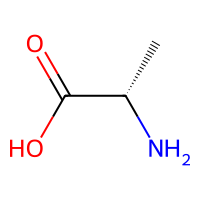
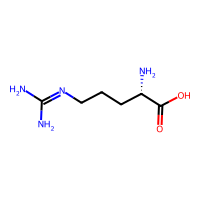
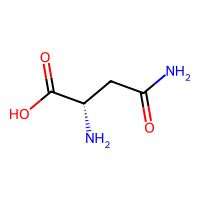

In [4]:
PandasTools.AddMoleculeColumnToFrame(aadf,'SMILES','Molecule',includeFingerprints=True)
aadf.head(3)

### Get the number of heavy atoms, molecular weight, and one other descriptor of your choice

I will use the apply function to do each of these three calculations and add a column to aadf with each one. This is the code I used in notebook 4.

```
for item in molecules:
    heavy_atoms.append(item.GetNumHeavyAtoms())
    molecular_weight = Descriptors.MolWt(item)
    mw.append(molecular_weight)
    elec = Descriptors.NumValenceElectrons(item)
    num_val_e.append(elec)

amino_acid_df['Heavy Atoms'] = heavy_atoms
amino_acid_df['Molecular Weight'] = mw
amino_acid_df['# Valence Electrons'] = num_val_e
amino_acid_df.head()
```

,SMILES,Molecule,Heavy Atoms,MolWt,Acid Groups
0,C[C@H](N)C(=O)O,,6,89.094,1
1,NC(N)=NCCC[C@H](N)C(=O)O,,12,174.204,1
2,NC(=O)C[C@H](N)C(=O)O,,9,132.119,1
3,N[C@@H](CC(=O)O)C(=O)O,,9,133.103,2
4,N[C@@H](CS)C(=O)O,,7,121.161,1
5,N[C@@H](CCC(=O)O)C(=O)O,,10,147.130,2
6,NC(=O)CC[C@H](N)C(=O)O,,10,146.146,1
7,NCC(=O)O,,5,75.067,1
8,N[C@@H](Cc1cnc[nH]1)C(=O)O,,11,155.157,1
9,CC[C@H](C)[C@H](N)C(=O)O,,9,131.175,1

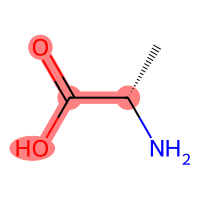
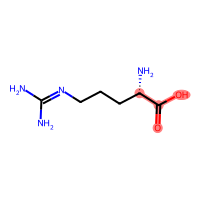
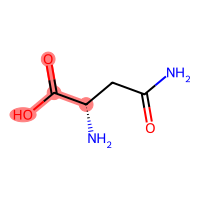
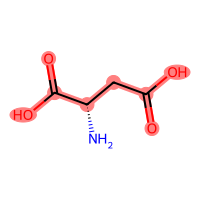
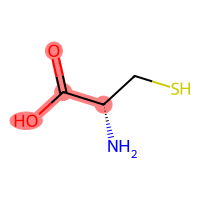
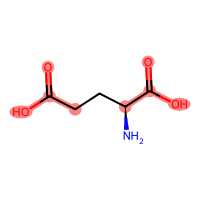
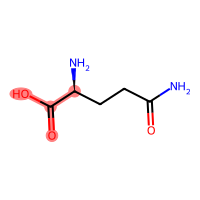
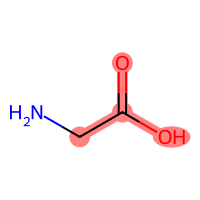
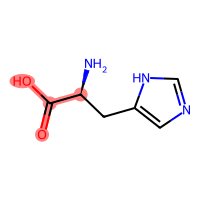
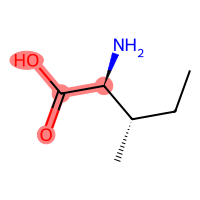
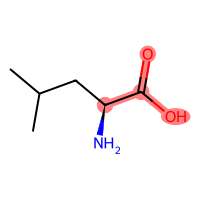
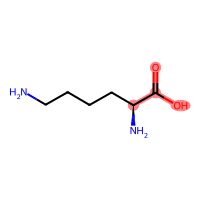
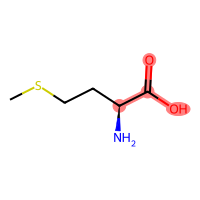
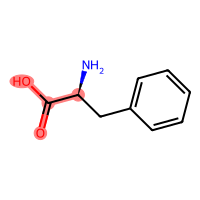
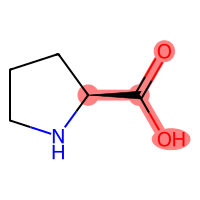
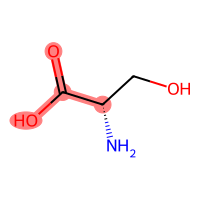
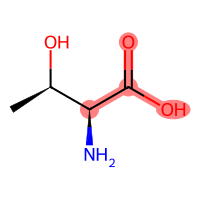
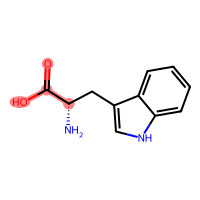
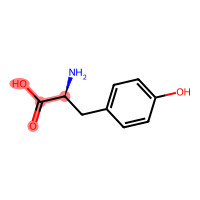
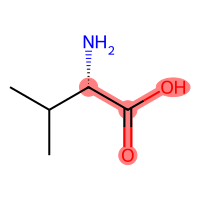

In [5]:
aadf["Heavy Atoms"] = aadf["Molecule"].apply(Descriptors.HeavyAtomCount)
aadf["MolWt"] = aadf["Molecule"].apply(Descriptors.MolWt)
aadf["Acid Groups"] = aadf["Molecule"].apply(Descriptors.fr_COO)
aadf

### Write a file with the data

I will generate a .csv file from aadf

In [6]:
outputfile = os.path.join('data', 'amino_acids_processed.csv')
aadf.to_csv(outputfile)